In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pt

In [2]:
data=pd.read_csv('Shopping Mall.csv',)
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [4]:
data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [5]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [6]:
data.drop(['invoice_no','customer_id','invoice_date'],axis=1,inplace=True)

In [7]:
data.columns

Index(['gender', 'age', 'category', 'quantity', 'price', 'payment_method',
       'shopping_mall'],
      dtype='object')

# 1. Which category products has highest number of customers

Text(0, 0.5, 'No of Customers')

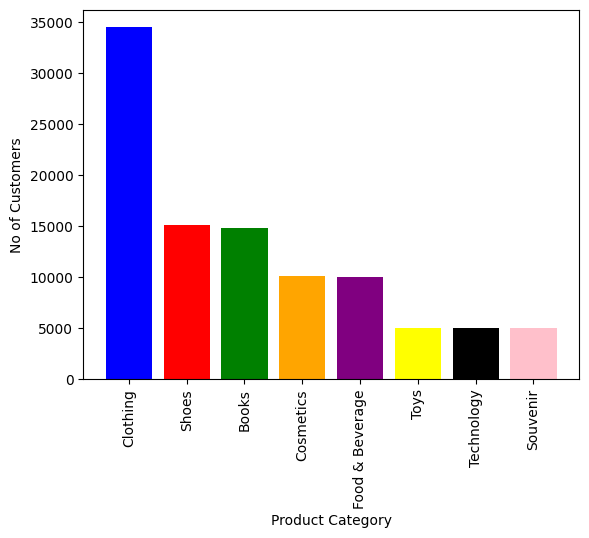

In [8]:
category_count=data['category'].value_counts()
category=data['category'].unique()

pt.bar(category,category_count,color=['blue','red','green','orange','purple','yellow','black','pink'])
pt.xticks(rotation=90)
pt.xlabel('Product Category')
pt.ylabel('No of Customers')

# 2. Which mall has highest number of customers

Text(0, 0.5, 'No of Customers')

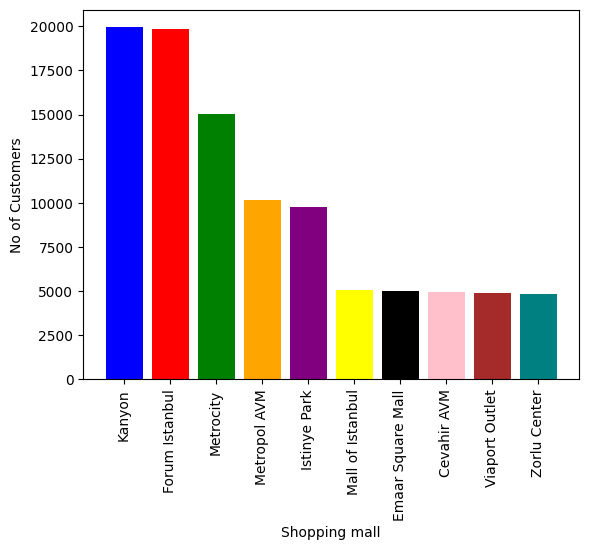

In [9]:
mall_count=data['shopping_mall'].value_counts()
mall=data['shopping_mall'].unique()

pt.bar(mall,mall_count,color=['blue','red','green','orange','purple','yellow','black','pink','brown','teal'])
pt.xticks(rotation=90)
pt.xlabel('Shopping mall')
pt.ylabel('No of Customers')

# 3. Which mall earns highest profit

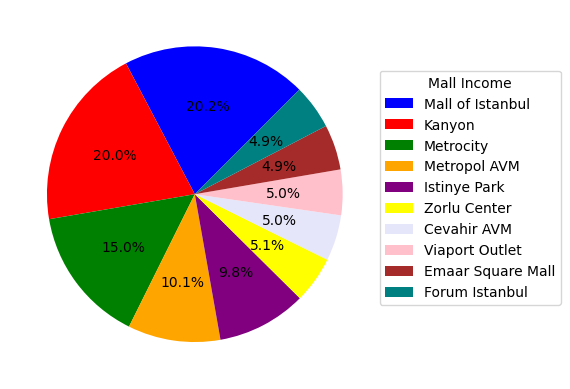

In [10]:
mall_income=data.groupby('shopping_mall')[['price']].sum().reset_index().sort_values(by=['price'],ascending=False)
price=mall_income['price']
labels=mall_income['shopping_mall']

pt.pie(price,autopct='%0.1f%%',
       colors=['blue','red','green','orange','purple','yellow','lavender','pink','brown','teal'],
       startangle=45)

pt.legend(labels,loc=(1,0.2),title='Mall Income')

# 4. Which category products are sold in high quantity

Text(0, 0.5, 'Quantity Sold')

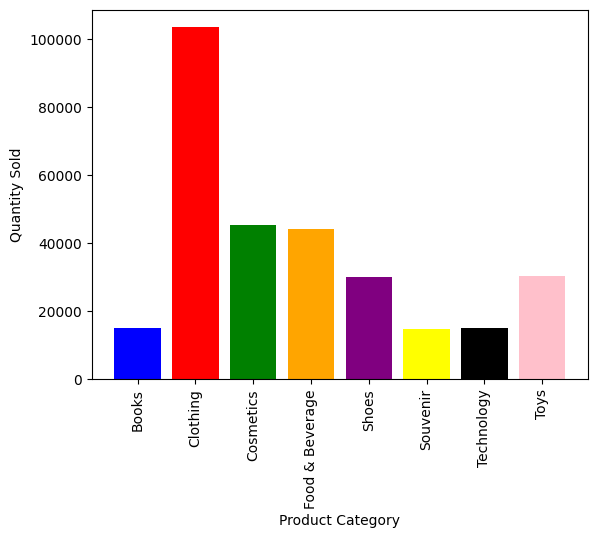

In [11]:
quantity=data.groupby('category')[['quantity']].sum().reset_index()
pt.bar(quantity['category'],quantity['quantity'],color=['blue','red','green','orange','purple','yellow','black','pink'])
pt.xticks(rotation=90)
pt.xlabel("Product Category")
pt.ylabel("Quantity Sold")

# 5. Which gender customers are high 

Text(0, 0.5, 'Count of Gender')

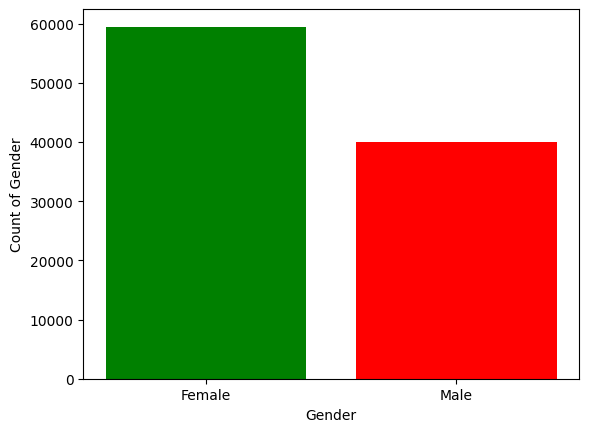

In [12]:
gender=data['gender'].value_counts()
pt.bar(['Female','Male'],gender,color=['green','red'])
pt.xlabel('Gender')
pt.ylabel('Count of Gender')

# 6. What category products does male customers like

Text(0, 0.5, 'Quantity')

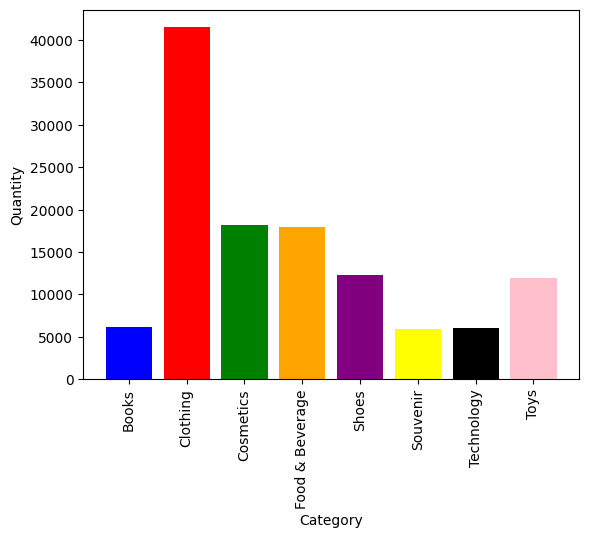

In [13]:
male_customers=data.where(data['gender']=='Male',inplace=False)
male_customers.dropna(inplace=True)
male_quantity=male_customers.groupby('category')[['quantity']].sum().reset_index()
pt.bar(male_quantity['category'],male_quantity['quantity'],
       color=['blue','red','green','orange','purple','yellow','black','pink'])

pt.xticks(rotation=90)
pt.xlabel('Category')
pt.ylabel('Quantity')


# 7. How much money does males spend on each category products

Text(0, 0.5, 'Amount')

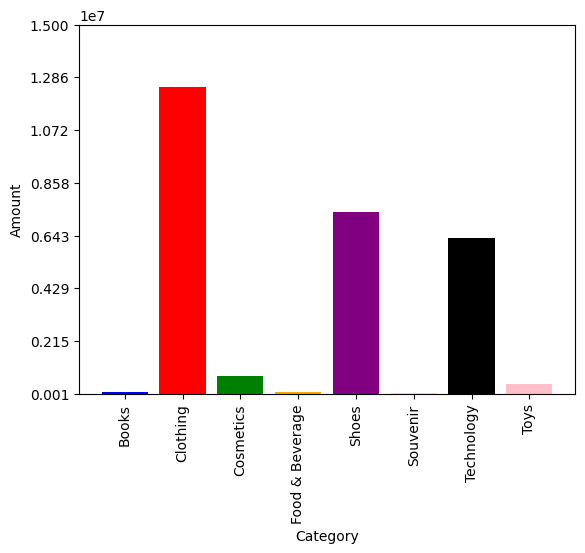

In [14]:
male_expenses=male_customers.groupby('category')[['price']].sum().reset_index()
pt.bar(male_expenses['category'],male_expenses['price'],
      color=['blue','red','green','orange','purple','yellow','black','pink'])
pt.xticks(rotation=90)
pt.yticks(np.linspace(10000,15000000,num=8))
pt.xlabel('Category')
pt.ylabel('Amount')

# 8. What category products does female customers like

Text(0, 0.5, 'Quantity')

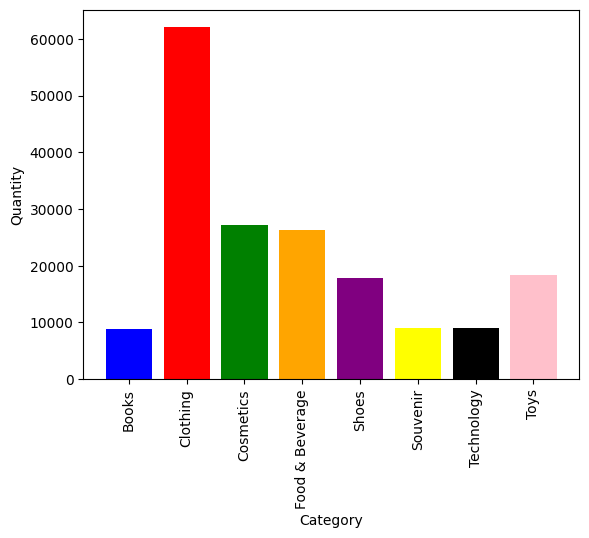

In [15]:
female_customers=data.where(data['gender']=='Female',inplace=False)
female_customers.dropna(inplace=True)
female_quantity=female_customers.groupby('category')[['quantity']].sum().reset_index()
pt.bar(female_quantity['category'],female_quantity['quantity'],
       color=['blue','red','green','orange','purple','yellow','black','pink'])
pt.xticks(rotation=90)
pt.xlabel('Category')
pt.ylabel('Quantity')

# 9. How much money does females spend on each category products

Text(0, 0.5, 'Amount')

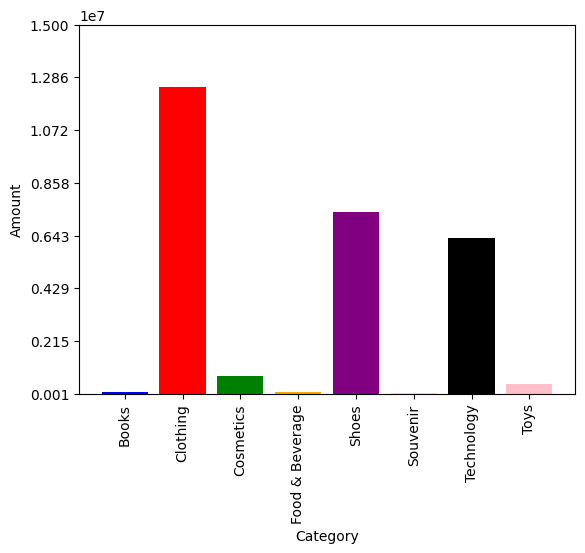

In [16]:
female_expenses=female_customers.groupby('category')[['price']].sum().reset_index()
pt.bar(female_expenses['category'],male_expenses['price'],
      color=['blue','red','green','orange','purple','yellow','black','pink'])
pt.xticks(rotation=90)
pt.yticks(np.linspace(10000,15000000,num=8))
pt.xlabel('Category')
pt.ylabel('Amount')

# 10. What is the commonly used payment method 

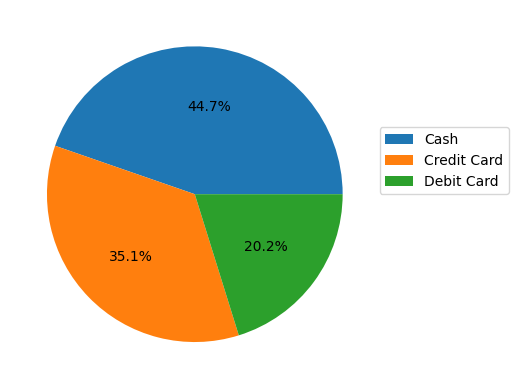

In [17]:
paym=data['payment_method'].value_counts()
pt.pie(paym,autopct='%0.1f%%')
labels=['Cash','Credit Card','Debit Card']
pt.legend(labels,loc=(1,0.5))